# CROP-seq KO150 - Connect DEA results of integrated bulk Listeria results with CROP-seq KO150 using GSEA
- goal: Investigate the relationship between CROP-seq KO150 DEA results and Listeria INT DEA results
- input: KO150 & INT DEA results
- output: summary plots of overlaps

In [1]:
cd ../

/home/sreichl/projects/bmdm-stim


In [2]:
# libraries
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import gseapy as gp
from gseapy import barplot
from matplotlib.colors import DivergingNorm

In [3]:
# configs
dir_sc = os.path.join('results','KO150')
dir_int = os.path.join('results','INT')

mixscape = True
    
dir_results = os.path.join(dir_sc, 'special_analysis','INT_comparison')

adj_pvalue=0.05
pval = 'p_val_adj'

In [4]:
if not os.path.exists(dir_results):
        os.mkdir(dir_results)

# Load KO150 data

In [5]:
annot = pd.read_csv(os.path.join(dir_sc, 'KO150_raw_metadata.csv'), index_col=0)
print(annot.shape)
annot.head()

(76344, 16)


,orig.ident,nCount_RNA,nFeature_RNA,nCount_AB,nFeature_AB,nCount_gRNA,nFeature_gRNA,nCount_HTO,nFeature_HTO,hto_demux,pass_QC,batch,percent.mt,guide_call,KO_call,condition
A1_AAACCTGAGAATCTCC-1,PT149_5_A1_transcriptome,17884,4442,987,9,358,51,379,3,HTO-RAW264.7-b_untreated,True,A1,1.481771,Chd7-2,Chd7,untreated
A1_AAACCTGAGCGATGAC-1,PT149_5_A1_transcriptome,12849,3787,1378,9,1103,56,288,3,HTO-RAW264.7-b_untreated,True,A1,1.299712,Babam1-1,Babam1,untreated
A1_AAACCTGAGGATCGCA-1,PT149_5_A1_transcriptome,21634,4842,1097,11,74,54,1062,3,HTO-RAW264.7-a_untreated,True,A1,1.127854,Negative,Negative,untreated
A1_AAACCTGAGTGCCAGA-1,PT149_5_A1_transcriptome,14479,3851,458,10,838,72,292,3,HTO-RAW264.7-b_untreated,True,A1,1.201740,Mov10-4,Mov10,untreated
A1_AAACCTGAGTGGAGAA-1,PT149_5_A1_transcriptome,13765,3832,1437,9,270,117,963,3,HTO-RAW264.7-b_untreated,True,A1,1.031602,Spi1-1,Spi1,untreated


In [6]:
# prepare metadata

# conditions
annot['condition'] = annot['hto_demux'].str.split(pat='_',n=1, expand=True)[1]
conditions = list(annot['condition'].unique())
conditions.remove(None)
print(conditions)

# KO target genes
KO_genes = list(annot['KO_call'].unique())
KO_genes.remove('Negative')
KO_genes.remove('Multiplet')
KO_genes.remove('NonTargeting')
print(KO_genes)

['untreated', 'LO28-6h', 'LO28-24h']
['Chd7', 'Babam1', 'Mov10', 'Spi1', 'Jmjd1c', 'Ezh2', 'Dnmt1', 'Smc1a', 'Arid1a', 'Ifi203', 'Elp2', 'Taf7', 'Prmt2', 'Morf4l2', 'Sfpq', 'Irf1', 'Ifnar1', 'Ube2d3', 'Ep300', 'Arid4a', 'Ppm1g', 'Sp100', 'Brd1', 'Kdm5a', 'Tyk2', 'Myc', 'Apobec3', 'Ywhaz', 'Ezh1', 'Fcgr1', 'Dtx3l', 'Phf11b', 'Irf9', 'Smarca5', 'Padi2', 'Chd1', 'Gadd45b', 'Prdm1', 'Yeats4', 'Phip', 'Pcgf5', 'Usp16', 'Pbrm1', 'Phf23', 'Rlim', 'Sirt2', 'Elp4', 'Kmt2a', 'Senp3', 'Irf3', 'Ubn1', 'Tlk2', 'Rela', 'Daxx', 'Chtop', 'Hdac2', 'Setdb2', 'Prmt1', 'Ep400', 'Set', 'Mllt6', 'Apobec1', 'Smyd3', 'Ppp4r2', 'Nap1l1', 'Eid1', 'Smarcc2', 'Anp32b', 'Ikzf1', 'Dnttip2', 'Brd7', 'Brd2', 'Stat2', 'Myd88', 'Dot1l', 'Yy1', 'Pkm', 'Hp1bp3', 'Pml', 'Csf1r', 'Anp32e', 'Jun', 'Sp110', 'Aebp2', 'Runx1', 'Gatad1', 'Chd2', 'Chd4', 'Baz1a', 'Aak1', 'Spen', 'Dek', 'Stat1', 'Smyd2', 'Brd3', 'Smyd5', 'Sap30', 'Tet2', 'Mbd2', 'Atad2', 'Ddx21', 'Elp5', 'Syncrip', 'Cited2', 'Irf8', 'Dnajc1', 'Supt16', 'Brwd3', '

In [7]:
SCT_counts = pd.read_csv(os.path.join(dir_sc, 'KO150_SCT_counts.csv'), index_col=0)
print(SCT_counts.shape)
SCT_counts.head()

(17131, 28303)


,A1_AAACCTGAGAATCTCC.1,A1_AAACCTGAGCGATGAC.1,A1_AAACCTGAGTGCCAGA.1,A1_AAACCTGAGTGGAGAA.1,A1_AAACCTGAGTTTAGGA.1,A1_AAACCTGCACATTCGA.1,A1_AAACCTGCATGCTGGC.1,A1_AAACCTGGTAATTGGA.1,A1_AAACCTGGTAGGCATG.1,A1_AAACCTGGTATATCCG.1,...,C3_TTTGCGCTCAAACCGT.1,C3_TTTGCGCTCACCAGGC.1,C3_TTTGCGCTCCAGAAGG.1,C3_TTTGGTTAGCCGATTT.1,C3_TTTGGTTAGTGAAGAG.1,C3_TTTGGTTCACCGATAT.1,C3_TTTGGTTGTCAGATAA.1,C3_TTTGGTTGTCGCTTTC.1,C3_TTTGGTTGTTCCATGA.1,C3_TTTGTCATCGCCCTTA.1
Mrpl15,1,0,1,2,1,1,2,1,5,5,...,2,0,0,0,0,1,0,2,1,0
Lypla1,0,0,1,2,0,2,1,0,0,0,...,0,2,0,0,0,0,0,0,0,0
Gm37988,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Tcea1,3,6,6,6,6,3,2,1,5,1,...,3,2,2,1,2,3,1,2,3,1
Rgs20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# define list of background genes
background = SCT_counts.index
background = list(set(background))
background = [str(x).upper() for x in list(background)]
print(len(background))
background[:5]

17131


['KLHL8', 'PRKACA', 'OLFR57', 'NHP2', 'SOCS3']

## Load DEA results from KO150 within condition between KOs

In [9]:
if mixscape:
    dea_folder = 'DEA_condition_mixscape'
#     top_n=3
else:
    dea_folder = 'DEA_condition'
#     top_n=1

In [10]:
# get significant genes per treatment and time point ie group
gene_lists_sc = dict()
gene_lists_sc_split = dict()

for cond in conditions:
    for KO_gene in KO_genes:
        tmp_path = os.path.join(dir_sc, dea_folder, 'KO150_DEA_RNA_{}_{}.csv'.format(cond, KO_gene))
        
        if not os.path.isfile(tmp_path):
            continue
        
        # load DEA analysis results
        tmp_results = pd.read_csv(tmp_path, index_col=0)
        
        tmp_genes = tmp_results.loc[(tmp_results[pval]<0.05), ].index.unique()
        
        if len(tmp_genes)==0:
                continue
            
        gene_lists_sc[cond+"_"+KO_gene] = tmp_genes
        
        # split DEA results by direction
        for direction in ['up','down']:
            if direction=='up':
                tmp_genes = tmp_results.loc[(tmp_results[pval]<0.05) & (tmp_results['avg_log2FC']>0), ].index.unique()
            else:
                tmp_genes = tmp_results.loc[(tmp_results[pval]<0.05) & (tmp_results['avg_log2FC']<0), ].index.unique()
        
            if len(tmp_genes)==0:
                continue
            
            gene_lists_sc_split[cond+"_"+KO_gene+"_"+direction] = tmp_genes

print(len(gene_lists_sc.keys()))
print(len(gene_lists_sc_split.keys()))     
gene_lists_sc.keys()

58
110


dict_keys(['untreated_Spi1', 'untreated_Dnmt1', 'untreated_Smc1a', 'untreated_Arid1a', 'untreated_Sfpq', 'untreated_Ifnar1', 'untreated_Ep300', 'untreated_Tyk2', 'untreated_Irf9', 'untreated_Ep400', 'untreated_Ikzf1', 'untreated_Dnttip2', 'untreated_Brd2', 'untreated_Stat2', 'untreated_Runx1', 'untreated_Chd4', 'untreated_Sf3b1', 'untreated_Yeats2', 'untreated_Jak1', 'untreated_Chd8', 'untreated_Med14', 'LO28-6h_Spi1', 'LO28-6h_Dnmt1', 'LO28-6h_Smc1a', 'LO28-6h_Arid1a', 'LO28-6h_Sfpq', 'LO28-6h_Ifnar1', 'LO28-6h_Ep300', 'LO28-6h_Irf9', 'LO28-6h_Yeats4', 'LO28-6h_Irf3', 'LO28-6h_Ep400', 'LO28-6h_Ikzf1', 'LO28-6h_Dnttip2', 'LO28-6h_Brd2', 'LO28-6h_Stat2', 'LO28-6h_Myd88', 'LO28-6h_Runx1', 'LO28-6h_Chd4', 'LO28-6h_Stat1', 'LO28-6h_Ddx21', 'LO28-6h_Med8', 'LO28-6h_Yeats2', 'LO28-6h_Jak1', 'LO28-6h_Smarca4', 'LO28-6h_Med14', 'LO28-24h_Spi1', 'LO28-24h_Smc1a', 'LO28-24h_Sfpq', 'LO28-24h_Ifnar1', 'LO28-24h_Tyk2', 'LO28-24h_Irf9', 'LO28-24h_Ep400', 'LO28-24h_Ikzf1', 'LO28-24h_Stat2', 'LO28-24h

In [11]:
# convert gene IDs to upper-case
for key in gene_lists_sc.keys():
    gene_lists_sc[key] = list(gene_lists_sc[key])
    gene_lists_sc[key] = [str(x).upper() for x in list(gene_lists_sc[key])]

In [12]:
# convert gene IDs to upper-case
for key in gene_lists_sc_split.keys():
    gene_lists_sc_split[key] = list(gene_lists_sc_split[key])
    gene_lists_sc_split[key] = [str(x).upper() for x in list(gene_lists_sc_split[key])]

# Load INT data

In [14]:
# Load sample annotation
annot = pd.read_csv(os.path.join(dir_int,'INT_annotations.csv'), index_col=0, header=0,)
print(annot.shape)
annot.head()

(142, 5)


,library,treatment,time,experiment,group
RNA_PT76_R1_C_albicans_2h,Quant-seq,C_albicans,2h,PT76,C_albicans_2h
RNA_PT82_R1_C_albicans_24h,Quant-seq,C_albicans,24h,PT82,C_albicans_24h
RNA_PT76_R1_C_albicans_4h,Quant-seq,C_albicans,4h,PT76,C_albicans_4h
RNA_PT76_R1_C_albicans_6h,Quant-seq,C_albicans,6h,PT76,C_albicans_6h
RNA_PT82_R1_C_albicans_8h,Quant-seq,C_albicans,8h,PT82,C_albicans_8h


In [15]:
treatments = list(annot['treatment'].unique())

In [16]:
timeseries_k = pd.read_csv(os.path.join('metadata','BMDM_timeseries_k.csv'), index_col=0, header=0,)

In [17]:
timeseries_k

,RNA,ATAC,INT
LO28,10,10,7
LPS,8,6,6
LCMV_Cl13,2,3,4
C_albicans,2,5,6
IFN_beta,4,8,4
IFN_gamma,3,6,5


In [18]:
treatments = list(timeseries_k.index)

## Load DEA results from INT time-series clusters

In [19]:
# treatments.remove('untreated')

# treatments.remove('C_albicans')

# treatments.remove('LCMV_Cl13')

treatments

['LO28', 'LPS', 'LCMV_Cl13', 'C_albicans', 'IFN_beta', 'IFN_gamma']

In [20]:
# get genes per treatment and per k clustering
gene_lists_int = dict()

for treatment in treatments:
    k = timeseries_k.loc[treatment,'INT']
    
    print("{}_{}".format(treatment,k))

    # load clustering result
    tmp_results = pd.read_csv(os.path.join(dir_int,'time_series',treatment, "k_{}".format(k), "clustering_"+treatment+".csv"), header=0, index_col=0)
    # make gene lists
    tmp_gene_lists_int=tmp_results.groupby('2')['1'].apply(list).to_dict()

    # rename gene_lists_int
    for key in tmp_gene_lists_int.keys():
        gene_lists_int[treatment+"_cluster_"+str(key)] = tmp_gene_lists_int[key]

    # convert to upper-case
    for key in gene_lists_int.keys():
        gene_lists_int[key] = [str(x).upper() for x in list(gene_lists_int[key])]

print(len(gene_lists_int.keys()))        
print(gene_lists_int.keys())

LO28_7
LPS_6
LCMV_Cl13_4
C_albicans_6
IFN_beta_4
IFN_gamma_5
32
dict_keys(['LO28_cluster_1', 'LO28_cluster_2', 'LO28_cluster_3', 'LO28_cluster_4', 'LO28_cluster_5', 'LO28_cluster_6', 'LO28_cluster_7', 'LPS_cluster_1', 'LPS_cluster_2', 'LPS_cluster_3', 'LPS_cluster_4', 'LPS_cluster_5', 'LPS_cluster_6', 'LCMV_Cl13_cluster_1', 'LCMV_Cl13_cluster_2', 'LCMV_Cl13_cluster_3', 'LCMV_Cl13_cluster_4', 'C_albicans_cluster_1', 'C_albicans_cluster_2', 'C_albicans_cluster_3', 'C_albicans_cluster_4', 'C_albicans_cluster_5', 'C_albicans_cluster_6', 'IFN_beta_cluster_1', 'IFN_beta_cluster_2', 'IFN_beta_cluster_3', 'IFN_beta_cluster_4', 'IFN_gamma_cluster_1', 'IFN_gamma_cluster_2', 'IFN_gamma_cluster_3', 'IFN_gamma_cluster_4', 'IFN_gamma_cluster_5'])


## Quantify overlap of DEGs

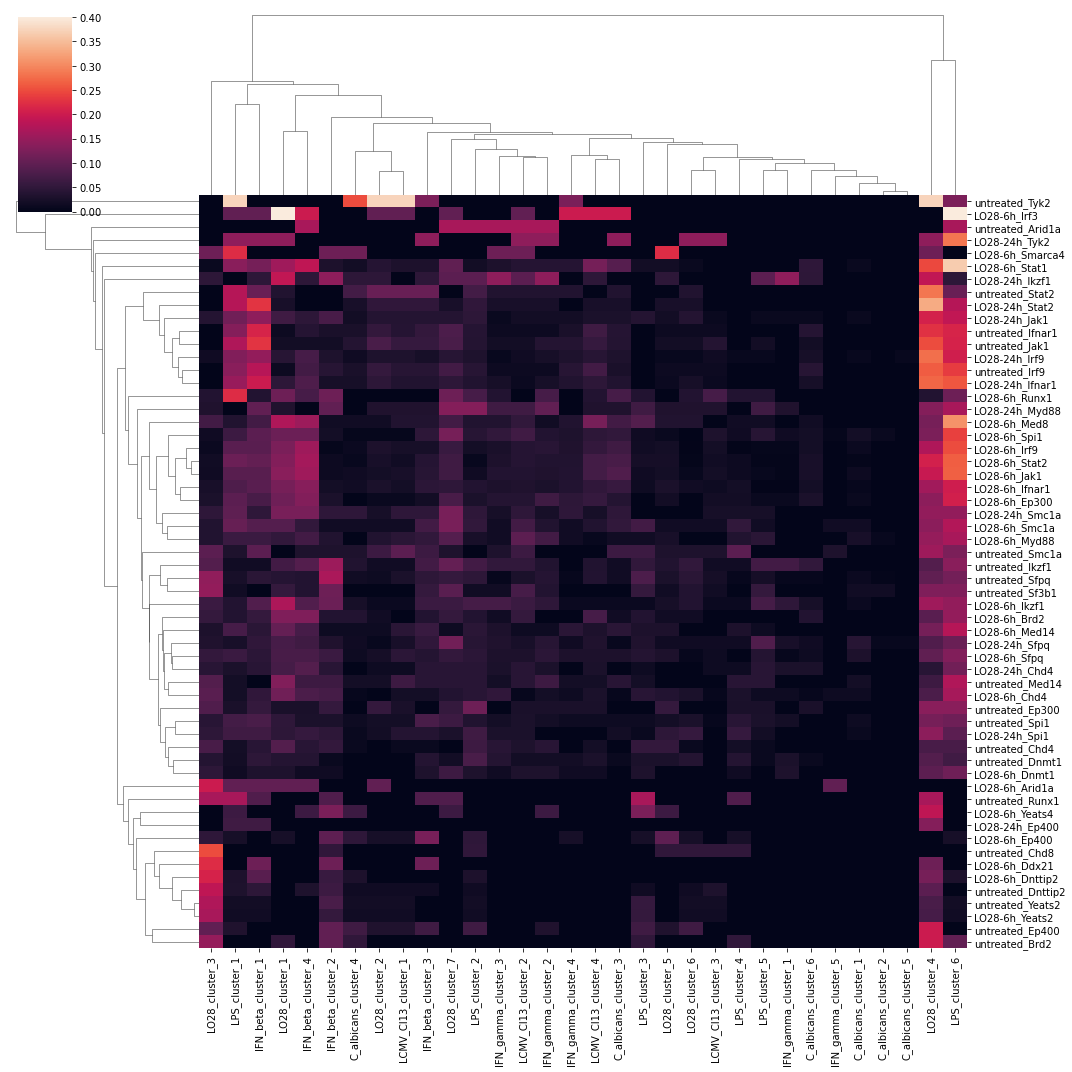

In [19]:
overlap_perc = pd.DataFrame()#(index=gene_lists_sc.keys(), columns=gene_lists_int.keys())

for sc_set in gene_lists_sc.keys():
    for int_set in gene_lists_int.keys():
        overlap_perc.loc[sc_set,int_set] = len(set(gene_lists_int[int_set]).intersection(gene_lists_sc[sc_set]))
    overlap_perc.loc[sc_set,:] = overlap_perc.loc[sc_set,:]/len(gene_lists_sc[sc_set])
    
overlap_perc.to_csv(os.path.join(dir_results,"overlap_percentage.csv"))

overlap_map = sns.clustermap(overlap_perc,
               xticklabels=True,
               yticklabels=True,
               figsize=(15, 15))

overlap_map.savefig(os.path.join(dir_results,"overlap_percentage_heatmap.png"))

## Perform GSEA

In [47]:
res = dict()
res_dfs = list()

for sc_set in gene_lists_sc_split.keys():
    try:
        res[sc_set] = gp.enrichr(gene_list=gene_lists_sc_split[sc_set],
                                 gene_sets=gene_lists_int,
                                 background=background,
                                 organism='mouse',
                                 outdir=os.path.join(dir_results,'GSEApy_output'),
                                 top_term=25,
                                 cutoff=0.05,
                                 format='svg',
                                 verbose=False,
                                )
    except ValueError:
        print("Result is empty")
        continue
    
    # move on if result is empty
    if res[sc_set].results.shape[0]==0:
        continue

    # annotate used gene set
    res[sc_set].results['Gene_set'] = sc_set
    
    gene_list_n=len(gene_lists_sc_split[sc_set])
    
    res_dfs.append(res[sc_set].results)

Result is empty
Result is empty
Result is empty
Result is empty
Result is empty
Result is empty
Result is empty
Result is empty
Result is empty
Result is empty
Result is empty
Result is empty
Result is empty
Result is empty
Result is empty
Result is empty
Result is empty
Result is empty
Result is empty
Result is empty
Result is empty
Result is empty
Result is empty
Result is empty
Result is empty
Result is empty
Result is empty
Result is empty
Result is empty
Result is empty
Result is empty
Result is empty
Result is empty
Result is empty
Result is empty
Result is empty
Result is empty
Result is empty
Result is empty
Result is empty
Result is empty
Result is empty
Result is empty
Result is empty
Result is empty
Result is empty
Result is empty


In [48]:
res.keys()

dict_keys(['untreated_Spi1_up', 'untreated_Spi1_down', 'untreated_Dnmt1_down', 'untreated_Sfpq_up', 'untreated_Sfpq_down', 'untreated_Ifnar1_up', 'untreated_Ifnar1_down', 'untreated_Ep300_up', 'untreated_Tyk2_down', 'untreated_Irf9_up', 'untreated_Irf9_down', 'untreated_Ikzf1_up', 'untreated_Dnttip2_down', 'untreated_Stat2_down', 'untreated_Sf3b1_up', 'untreated_Sf3b1_down', 'untreated_Yeats2_down', 'untreated_Jak1_up', 'untreated_Jak1_down', 'untreated_Chd8_down', 'untreated_Med14_up', 'LO28-6h_Spi1_up', 'LO28-6h_Spi1_down', 'LO28-6h_Smc1a_down', 'LO28-6h_Sfpq_up', 'LO28-6h_Ifnar1_up', 'LO28-6h_Ifnar1_down', 'LO28-6h_Ep300_up', 'LO28-6h_Ep300_down', 'LO28-6h_Irf9_down', 'LO28-6h_Irf3_down', 'LO28-6h_Ep400_up', 'LO28-6h_Ikzf1_up', 'LO28-6h_Ikzf1_down', 'LO28-6h_Dnttip2_up', 'LO28-6h_Dnttip2_down', 'LO28-6h_Brd2_down', 'LO28-6h_Stat2_up', 'LO28-6h_Stat2_down', 'LO28-6h_Myd88_down', 'LO28-6h_Runx1_up', 'LO28-6h_Chd4_up', 'LO28-6h_Stat1_down', 'LO28-6h_Med8_up', 'LO28-6h_Med8_down', 'LO28

In [49]:
# concatenate all result data frames
res_all = pd.concat(res_dfs)

print(res_all.shape)
res_all.head()

(1059, 8)


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Odds Ratio,Genes,Odds Ratio1
0,untreated_Spi1_up,C_albicans_cluster_1,1/77,0.280755,0.467925,4.552925,PDE4B,3.076118
1,untreated_Spi1_up,C_albicans_cluster_4,1/103,0.356715,0.494133,3.403998,RPL23,2.296117
2,untreated_Spi1_up,IFN_beta_cluster_1,10/411,0.000009,0.000228,6.718851,SLFN4;LY6A;H2-Q6;H2-T22;H2-Q4;CCL5;FBXO32;TAPB...,6.457344
3,untreated_Spi1_up,IFN_beta_cluster_2,2/535,0.669818,0.747354,1.083655,RPL21;TMEM176B,0.873819
4,untreated_Spi1_up,IFN_beta_cluster_3,4/672,0.321504,0.494133,1.584718,LCN2;TNFRSF9;KANK3;PDE4B,1.419859


In [50]:
def get_degs(row):
    genes = row['Genes'].split(';')
    
    if row['Gene_set']+'_up' in gene_lists_sc_split.keys():
        up = len(set(genes) & set(gene_lists_sc_split[row['Gene_set']+'_up']))
    else:
        up = 0
        
    if row['Gene_set']+'_down' in gene_lists_sc_split.keys():
        down = len(set(genes) & set(gene_lists_sc_split[row['Gene_set']+'_down']))
    else:
        down = 0
        
    if row['Adjusted P-value']<0.05:
        return (str(up)+'*'+str(down))
    else:
        return (str(up)+'|'+str(down))

In [51]:
# extend results to include directionality of the DEGs that contributed to the enrichment in a cluster
# res_all['degs_up_down'] = res_all.apply(get_degs, axis=1)

In [52]:
# save result data frame
res_all.to_csv(os.path.join(dir_results,"GSEA_split_results.csv"))

In [53]:
# widen result dataframe for adj.pval & odd-ratio
res_adjp = pd.pivot(res_all, index='Gene_set', columns='Term', values='Adjusted P-value')
res_or = pd.pivot(res_all, index='Gene_set', columns='Term', values='Odds Ratio')

res_adjp.shape

(63, 32)

In [55]:
# prepare significance annotation df
sig_mask = res_adjp<0.05
nsig_mask = res_adjp>=0.05
res_adjp[res_adjp.isna() | nsig_mask] = ''
res_adjp[sig_mask] = '*'

In [56]:
# prepare odds ration df for plotting
mask = res_or.isna()
res_or[mask] = 1
res_or_log = np.log2(res_or.apply(pd.to_numeric))

/home/sreichl/tmp/ipykernel_3747791/761343876.py:3: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
  divnorm = DivergingNorm(vmin=res_or_log.min().min(), vcenter=0, vmax=res_or_log.max().max())


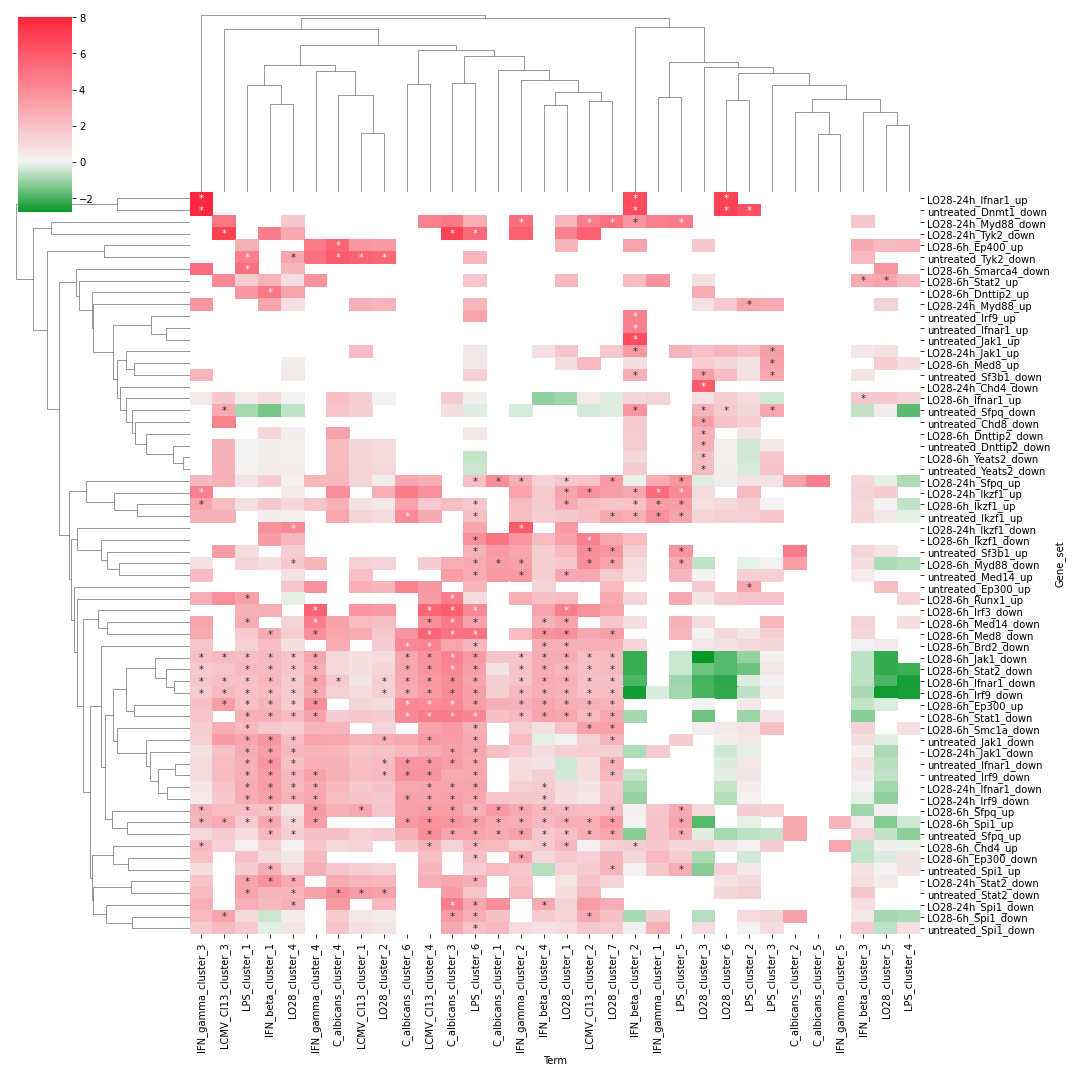

In [57]:
# prepare colormap for plotting
rdgn = sns.diverging_palette(h_neg=130, h_pos=10, s=99, l=55, sep=3, as_cmap=True)
divnorm = DivergingNorm(vmin=res_or_log.min().min(), vcenter=0, vmax=res_or_log.max().max())

gsea_map = sns.clustermap(res_or_log,
               xticklabels=True,
               yticklabels=True,
               figsize=(15, 15),
              mask = mask,
              cmap=rdgn,
               norm=divnorm,
              annot=res_adjp, #res_degs, #res_adjp,
              fmt='',)

gsea_map.savefig(os.path.join(dir_results,"GSEA_split_oddsratio_heatmap.png"))

In [30]:
pre_res = dict()
pre_res_dfs = list()

for cond in conditions:
    for KO_gene in KO_genes:
        group = '{}_{}'.format(cond, KO_gene)
        
        tmp_path = os.path.join(dir_sc, dea_folder, 'KO150_DEA_RNA_{}_{}.csv'.format(cond, KO_gene))
        
        if not os.path.isfile(tmp_path):
            continue

        # load DEA analysis results
        tmp_results = pd.read_csv(tmp_path, index_col=0)
        
        # make all genes uppercase
        tmp_results.index = [str(x).upper() for x in list(tmp_results.index)]
        
        # calculate score for each gene that describes the strength of KO effect -log10(p-value)*(LFC)
        # alternative default for DEA results: -log10(p-value)*sign(LFC)
        # tmp_results['score'] = -np.log10(tmp_results['p_val']) * np.sign(tmp_results['avg_log2FC'])
        tmp_results['score'] = -np.log10(tmp_results['p_val']) * (abs(tmp_results['avg_log2FC']))
        
        # run prerank gsea
        pre_res[group] = gp.prerank(rnk=tmp_results['score'], 
                     gene_sets=gene_lists_int,
                     processes=4,
                     min_size=5,
                     max_size=1000,
                     permutation_num=1000, # reduce number to speed up testing
                     outdir=None,
                     seed=42,
                     verbose=False,
                    )
        
        pre_res[group].res2d['Gene_set'] = group
        pre_res_dfs.append(pre_res[group].res2d)
        

In [31]:
# concatenate all result data frames
pre_res_all = pd.concat(pre_res_dfs)
pre_res_all=pre_res_all.reset_index()

pre_res_all.to_csv(os.path.join(dir_results,"prerank_NES.csv"))

pre_res_all.head()

,Term,es,nes,pval,fdr,geneset_size,matched_size,genes,ledge_genes,Gene_set
0,C_albicans_cluster_1,0.753228,1.320411,0.129817,0.144694,92,18,PLEK;PDE4B;RGL1;TRIB1;PAM16;MXD1;CAR2;RALGDS;H...,PLEK;PDE4B;RGL1;TRIB1;PAM16;MXD1;CAR2,untreated_Spi1
1,IFN_beta_cluster_1,0.759041,1.330868,0.021000,0.147708,520,114,LY6A;HPSE;FCGR1;H2-Q4;CCL5;H2-Q6;XDH;H2-T22;SL...,LY6A;HPSE;FCGR1;H2-Q4;CCL5;H2-Q6;XDH;H2-T22;SL...,untreated_Spi1
2,LPS_cluster_6,0.764984,1.342724,0.038000,0.148601,783,223,TYROBP;WFDC17;LPL;HP;TMEM176A;SAA3;CYBB;BRI3BP...,TYROBP;WFDC17;LPL;HP;TMEM176A;SAA3;CYBB;BRI3BP...,untreated_Spi1
3,LCMV_Cl13_cluster_2,0.754823,1.343725,0.034034,0.165795,240,53,WFDC17;PLEK;S100A4;PDE4B;PHF11D;CP;GBP7;CCDC86...,WFDC17;PLEK;S100A4;PDE4B;PHF11D;CP;GBP7;CCDC86...,untreated_Spi1
4,IFN_gamma_cluster_1,0.783723,1.365633,0.118731,0.180867,151,14,BRI3BP;PLD4;CD33;LCN2;TRIB1;ID2;CCDC106;TMA16;...,BRI3BP;PLD4;CD33;LCN2;TRIB1;ID2;CCDC106;TMA16;...,untreated_Spi1


In [32]:
# widen result dataframe for adj.pval & odd-ratio
pre_res_fdr = pd.pivot(pre_res_all, index='Gene_set', columns='Term', values='fdr')
pre_res_nes = pd.pivot(pre_res_all, index='Gene_set', columns='Term', values='nes')

pre_res_fdr.shape

(58, 29)

In [33]:
# prepare significance annotation df
sig_mask = pre_res_fdr<0.05
nsig_mask = pre_res_fdr>=0.05
pre_res_fdr[pre_res_fdr.isna() | nsig_mask] = ''
pre_res_fdr[sig_mask] = '*'

In [34]:
# prepare odds ration df for plotting
mask = pre_res_nes.isna()
pre_res_nes[mask] = 1
pre_res_nes_log = np.log2(pre_res_nes.apply(pd.to_numeric))

/home/sreichl/tmp/ipykernel_853320/3817605332.py:3: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
  divnorm = DivergingNorm(vmin=pre_res_nes_log.min().min(), vcenter=0, vmax=pre_res_nes_log.max().max())


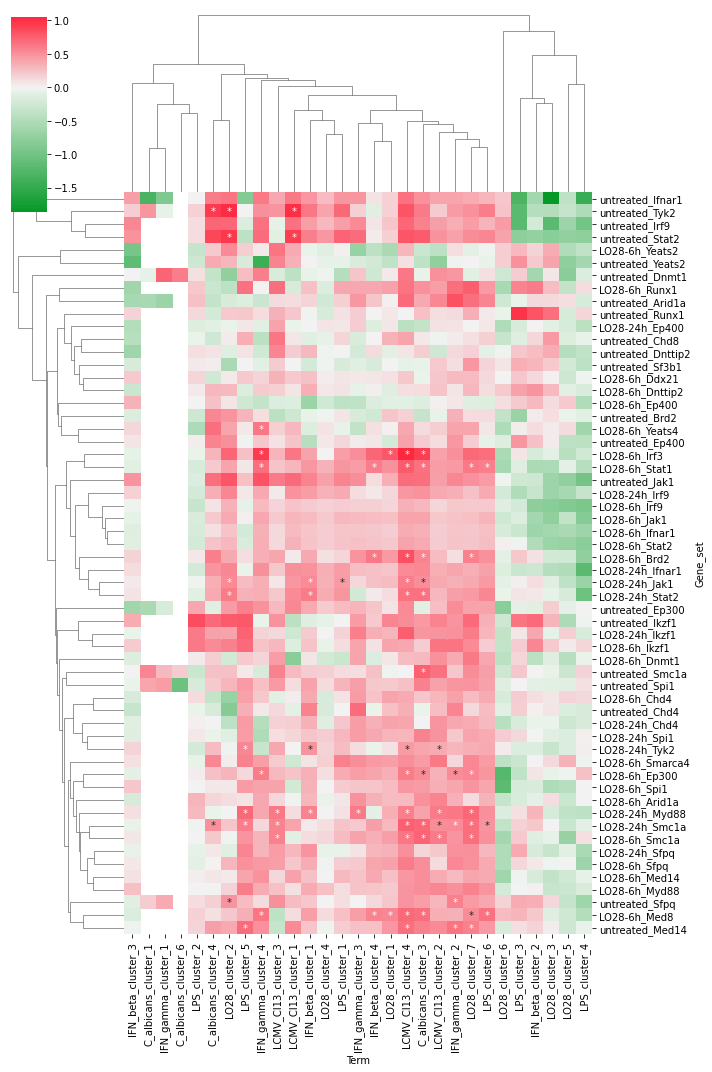

In [35]:
# prepare colormap for plotting
rdgn = sns.diverging_palette(h_neg=130, h_pos=10, s=99, l=55, sep=3, as_cmap=True)
divnorm = DivergingNorm(vmin=pre_res_nes_log.min().min(), vcenter=0, vmax=pre_res_nes_log.max().max())

prerank_map = sns.clustermap(pre_res_nes_log,
               xticklabels=True,
               yticklabels=True,
               figsize=(10, 15),
              mask = mask,
              cmap=rdgn,
               norm=divnorm,
              annot=pre_res_fdr,
              fmt='',)

prerank_map.savefig(os.path.join(dir_results,"prerank_NES_heatmap.png"))

In [36]:
# make enrichment dot plot of validation and discovery/most interesting hit
for group,term in [('LO28-6h_Stat1','LO28_cluster_7'), ('untreated_Sfpq','LO28_cluster_2')]:
    gp.gseaplot(rank_metric=pre_res[group].ranking, term='{} in {}'.format(group, term), **pre_res[group].results[term], figsize=(4,4), ofname=os.path.join(dir_results,"prerank_gseaplot_{}_in_{}.png".format(group, term)))